This program attempts to optimise a user's portfolio using the efficient frontier

# Portfolio Optimisation
**Definition** : The process of selecting the best best portfolio (Asset Distribution) out of a set of all portfolios being considered, according to some objective. The objectie typically maximises factors such as expected return, and minimses costs like financial risk.



In [ ]:
!pip install pandas --upgrade

In [ ]:
!pip install pandas-datareader --upgrade

In [ ]:
pip install yfinance

In [22]:
#Import libraries
from pandas_datareader import data as pdr
import pandas as pd
import numpy as np
import yfinance as yf
yf.pdr_override()
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (12.5, 8.5)
from sklearn.preprocessing import StandardScaler

In [41]:
#Input asset symbols into the portfolio
assets = []
n = int(input("Enter the list size: "))

print("\n")
for i in range(0, n):
  print("Enter asset symbol: ", i)
  symbol = input()
  assets.append(symbol)
print("The assets in the portfolio are ", assets)

Enter the list size: 5


Enter asset symbol:  0
aapl
Enter asset symbol:  1
amzn
Enter asset symbol:  2
tsla
Enter asset symbol:  3
goog
Enter asset symbol:  4
meta
The assets in the portfolio are  ['aapl', 'amzn', 'tsla', 'goog', 'meta']


In [42]:
#Assign weights to the stocks
portfolio_weights = []

total_portfolio_value = float(input("Total invested value of portfolio in dollars, $"))
length = len(assets)
for j in range(length):
  print("Enter the investment amount in dollars for", assets[j])
  asset_value = float(input("$"))
  weighted_value = asset_value/total_portfolio_value
  portfolio_weights.append(weighted_value)
weights = np.array(portfolio_weights)
print("The weights in the portfolio are", portfolio_weights, "respectively.")

Total invested value of portfolio in dollars, $1000
Enter the investment amount in dollars for aapl
$200
Enter the investment amount in dollars for amzn
$200
Enter the investment amount in dollars for tsla
$200
Enter the investment amount in dollars for goog
$200
Enter the investment amount in dollars for meta
$200
The weights in the portfolio are [0.2, 0.2, 0.2, 0.2, 0.2] respectively.


In [36]:
#Get transaction open date
startDate = input("Enter the transaction open in format (YYYY-MM-DD): ")
print(startDate)

Enter the transaction open in format (YYYY-MM-DD): 2020-01-01
2020-01-01


In [37]:
#Get assets' close date (ie. today's date)
today = datetime.today().strftime('%Y-%m-%d')
print(today)

2023-02-16


In [43]:
# Create a dataframe to store the adjusted close price of the assets
df = pd.DataFrame()

#Store the adjusted close price into the dataframe
for asset in assets:
  df[asset] = pdr.get_data_yahoo(asset, start = startDate, end = today)['Adj Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [44]:
#visualise dataframe
df

,aapl,amzn,tsla,goog,meta
Date,,,,,
2020-01-02,73.449379,94.900497,28.684000,68.368500,209.779999
2020-01-03,72.735313,93.748497,29.534000,68.032997,208.669998
2020-01-06,73.314888,95.143997,30.102667,69.710503,212.600006
2020-01-07,72.970085,95.343002,31.270666,69.667000,213.059998
2020-01-08,74.143890,94.598503,32.809334,70.216003,215.220001
...,...,...,...,...,...
2023-02-09,150.639999,98.239998,207.320007,95.459999,177.919998
2023-02-10,151.009995,97.610001,196.889999,94.860001,174.149994
2023-02-13,153.850006,99.540001,194.639999,95.000000,179.429993


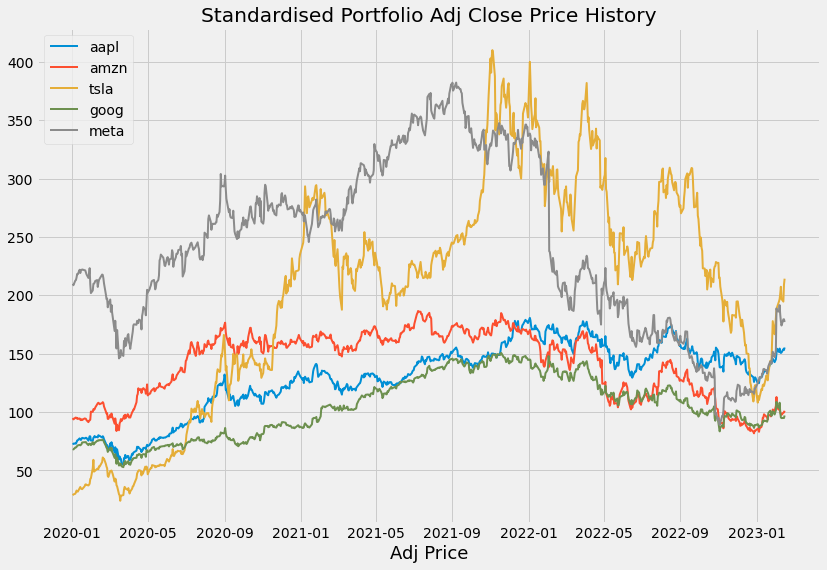

In [46]:
# Visually show the portfolio
title = 'Portfolio Adj Close Price History'

my_assets = df

# Create a graph
for c in my_assets.columns.values:
  plt.plot(my_assets[c], linewidth=2, label = c)

plt.title(title)
plt.xlabel('Adj Price', fontsize = 18)
plt.legend(my_assets.columns.values, loc = 'upper left')
plt.show()

In [47]:
#Show the simple daily returns
returns = df.pct_change()
returns

,aapl,amzn,tsla,goog,meta
Date,,,,,
2020-01-02,NaN,NaN,NaN,NaN,NaN
2020-01-03,-0.009722,-0.012139,0.029633,-0.004907,-0.005291
2020-01-06,0.007968,0.014886,0.019255,0.024657,0.018834
2020-01-07,-0.004703,0.002092,0.038801,-0.000624,0.002164
2020-01-08,0.016086,-0.007809,0.049205,0.007880,0.010138
...,...,...,...,...,...
2023-02-09,-0.006912,-0.018091,0.029957,-0.045400,-0.030039
2023-02-10,0.002456,-0.006413,-0.050309,-0.006285,-0.021189
2023-02-13,0.018807,0.019773,-0.011428,0.001476,0.030319


# Covariance Matrix
a square matrix giving the covariance between each pair of elements of a given random vector

In finance, a covariance matrix is a tool used to measure the relationship between the movement of two asset prices and shows the measure of correlation between them.

*the left-to-right diagonal values are the variances of the assets*

In [48]:
#Annualised covariance matrix
cma = returns.cov() * 252
cma

,aapl,amzn,tsla,goog,meta
aapl,0.133870,0.093862,0.137869,0.091558,0.112724
amzn,0.093862,0.155348,0.132875,0.094279,0.121695
tsla,0.137869,0.132875,0.526050,0.111624,0.130345
goog,0.091558,0.094279,0.111624,0.121960,0.122350
meta,0.112724,0.121695,0.130345,0.122350,0.250618


# Variance
is a measurement of the spread between numbers in a data set.

Investors use variance to see how much risk an investment carries and whether it will be profitable.

In [49]:
# Portfolio variance annual
pvarA = np.dot(weights.T, np.dot(cma, weights))
pvarA

0.13944835804073274

# Volatility
is the degree of variation of a trading price series over time.

In [50]:
# Portfolio Volatility / Standard Deviation
pvolA = np.sqrt(pvarA)
pvolA

0.373427848507222

In [51]:
# Annual Portfolio Return (Portfolio Simple Annual Return)
pSARA = np.sum(returns.mean() * weights) * 252
pSARA

0.3121373842110549

In [52]:
# Exected Annual Return, Volatility (risk), and Variance
percent_varA = str(round(pvarA, 2) * 100) + '%'
percent_volA = str(round(pvolA, 2) * 100) + "%"
percent_retA = str(round(pSARA, 2) * 100) + '%'

print('The Estimated Expected Annual Return for your portfolio is', percent_retA)
print('The Estimated Annual Volatity / Risk for your portfolio is', percent_volA)
print('The Estimated Annual Variance for your portfolio is', percent_varA)

The Estimated Expected Annual Return for your portfolio is 31.0%
The Estimated Annual Volatity / Risk for your portfolio is 37.0%
The Estimated Annual Variance for your portfolio is 14.000000000000002%


In [ ]:
!pip install PyPortfolioOpt

In [54]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

In [55]:
# Portfolio Optimisation

# Expected Returns and Annualised Sample Covariance Matrix of Asset Returns
mu = expected_returns.mean_historical_return(df)
S = risk_models.sample_cov(df)

# Sharpe Ratio
*Developed by Nobel William F. Sharpe*
Used to help investors understand the return of an investment compared to its risk. The ratio is the **average return earned in excess to the risk-free rate per unit of volatility or total risk**.

In [56]:
# Optimise for maximal sharpe ratio
ef = EfficientFrontier(mu, S)
weights = ef.max_sharpe()
cleaned_weights = ef.clean_weights()
print(cleaned_weights)
ef.portfolio_performance(verbose = True)

OrderedDict([('aapl', 0.10833), ('amzn', 0.0), ('tsla', 0.89167), ('goog', 0.0), ('meta', 0.0)])
Expected annual return: 83.7%
Annual volatility: 66.8%
Sharpe Ratio: 1.22


(0.8366799599181034, 0.6681709769571385, 1.2222619480380266)